In [1]:
import os, shutil
import copy
original_dataset_dir = '/Users/iggym/Desktop/dataset/training_set/'
#path to original dataset
base_dir= '/Users/iggym/Downloads/smallerset/'
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train/')
os.mkdir(train_dir)
#making the training directories
validation_dir = os.path.join(base_dir, 'validation/')
os.mkdir(validation_dir)
#vaildation directory
test_dir = os.path.join(base_dir, 'test/')
os.mkdir(test_dir)
#test directory
train_cats_dir = os.path.join(train_dir, 'cats/')
os.mkdir(train_cats_dir)
#seperating the cats and dogs
train_dogs_dir = os.path.join(train_dir, 'dogs/')
os.mkdir(train_dogs_dir)
#validation directories for the cats and dogs
validation_cats_dir = os.path.join(validation_dir, 'cats/')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs/')
os.mkdir(validation_dogs_dir)
#test directories for the cats and dogs
test_cats_dir = os.path.join(test_dir, 'cats/')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs/')
os.mkdir(test_dogs_dir)



In [6]:
#coppy the first 1000 cat training imagges
import shutil
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
#copying the next 500 for validation
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
#copying the next 500 for test
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
#copying the first 1000 dog images for training
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
#copy the next 500 dog images for dog validation
fnames = ['dog.{}.jpg'.format(i) for i in range (1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
#copy the next 500 dog images for testing
fnames = ['dog.{}.jpg'.format(i) for i in range (1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

    

In [19]:
from keras import layers
from keras import models
model = models.Sequential()
#forming the network
model.add(layers.Conv2D(32, (3,3), activation = 'relu',
                        input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
#this is the instatiation of convnet#
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [20]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])
#configuring the model for training

In [21]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen= ImageDataGenerator(rescale=1./255)
#rescales images
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='binary')
#resize images
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size = 20,
        class_mode='binary')
#using imagedata generator to read images


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:',data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
# making sure I'm not making a mistake

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [23]:
#fitting models using batch generator
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)
    

Epoch 1/30
100/100 [==============================] - 853s 9s/step - loss: 0.6886 - acc: 0.5375 - val_loss: 0.6854 - val_acc: 0.5410
Epoch 2/30
100/100 [==============================] - 677s 7s/step - loss: 0.6547 - acc: 0.6120 - val_loss: 0.6368 - val_acc: 0.6590
Epoch 3/30
100/100 [==============================] - 536s 5s/step - loss: 0.6052 - acc: 0.6920 - val_loss: 0.6102 - val_acc: 0.6700
Epoch 4/30
100/100 [==============================] - 544s 5s/step - loss: 0.5715 - acc: 0.7155 - val_loss: 0.5975 - val_acc: 0.6730
Epoch 5/30
100/100 [==============================] - 540s 5s/step - loss: 0.5348 - acc: 0.7335 - val_loss: 0.5747 - val_acc: 0.6890
Epoch 6/30
100/100 [==============================] - 543s 5s/step - loss: 0.5180 - acc: 0.7495 - val_loss: 0.5876 - val_acc: 0.6840
Epoch 7/30
100/100 [==============================] - 538s 5s/step - loss: 0.4789 - acc: 0.7705 - val_loss: 0.5726 - val_acc: 0.6970
Epoch 8/30
100/100 [==============================] - 547s 5s/step - 

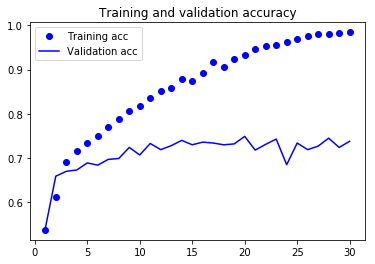

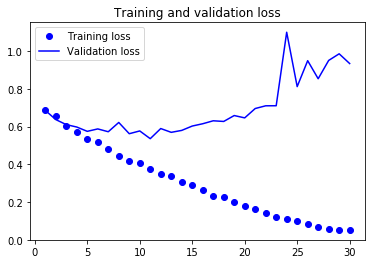

In [26]:
model.save('cats_and_dogs_small_1.h5')
import matplotlib.pyplot as plt
#import and save the required materials
#gain the loss and accuracy values
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
#plot the accuracies
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
#plot the losses
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
#create the graph
plt.show()